In [1]:
pip install pandas matplotlib seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("IMDB Dataset.csv")

# Show the first few rows
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
# Dataset size
print(f"Dataset contains {len(df)} rows")

# Check column names and data types
print(df.info())

# Check class balance
print(df['sentiment'].value_counts())

Dataset contains 50000 rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


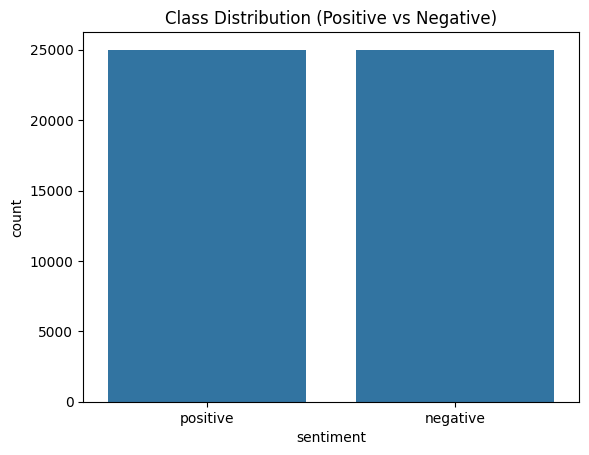

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title("Class Distribution (Positive vs Negative)")
plt.show()


count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64


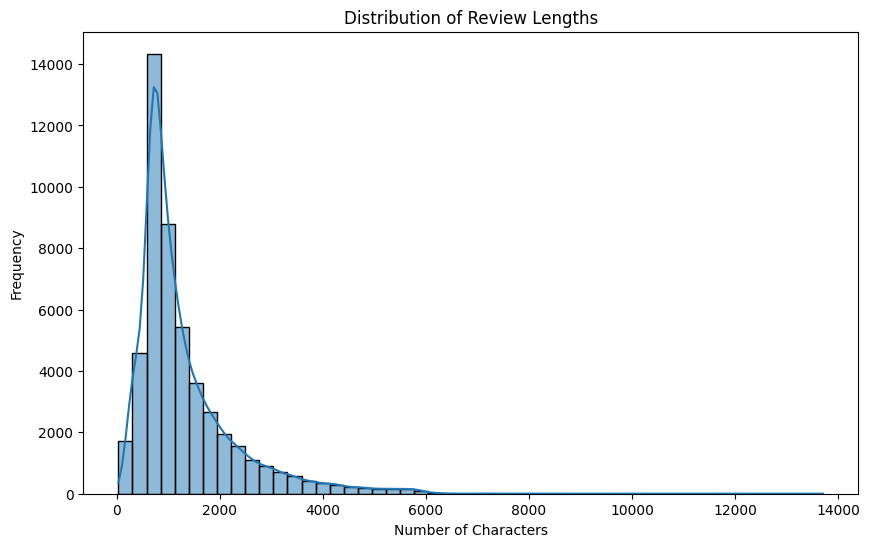

In [15]:
df['review_length'] = df['review'].apply(len)

# Summary stats
print(df['review_length'].describe())

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()


In [16]:
print("Positive Review Example:\n", df[df['sentiment'] == 'positive']['review'].iloc[0])
print("\nNegative Review Example:\n", df[df['sentiment'] == 'negative']['review'].iloc[0])


Positive Review Example:
 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of 

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Combine all text
text = " ".join(df['review'])

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in All Reviews")
plt.show()


In [3]:
import re

def clean_text(text):
    text = re.sub(r"<.*?>", "", text)  # remove HTML tags
    text = re.sub(r"[^a-zA-Z']", " ", text)  # keep only letters and apostrophes
    return text.lower()

df['cleaned_review'] = df['review'].apply(clean_text)


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import re

# Load and preprocess data (assuming you already have df loaded)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join(text.split())
    return text

df['processed_review'] = df['review'].apply(preprocess_text)
df['label'] = df['sentiment'].map({'negative': 0, 'positive': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_review'], df['label'], 
    test_size=0.2, random_state=42, stratify=df['label']
)

# Create TF-IDF features
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"Data prepared: {X_train_vec.shape[0]} train, {X_test_vec.shape[0]} test")
print(f"Features: {X_train_vec.shape[1]}")

Data prepared: 40000 train, 10000 test
Features: 2000


In [5]:
# Cell 3: Train Logistic Regression
print("Training Logistic Regression...")

lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_vec, y_train)

# Make predictions
lr_pred = lr.predict(X_test_vec)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, lr_pred)

print(f"Logistic Regression Test Accuracy: {lr_accuracy:.4f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_pred, target_names=['Negative', 'Positive']))

Training Logistic Regression...
Logistic Regression Test Accuracy: 0.8752

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.87      5000
    Positive       0.87      0.88      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [1]:
# Cell 2: Train k-Nearest Neighbors (Memory Safe)
print("Training k-Nearest Neighbors...")

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)

print("kNN trained successfully")

# Test with smaller batch first
test_size = min(1000, len(X_test))
X_test_small = X_test_vec[:test_size]
y_test_small = y_test[:test_size]

print(f"Testing on {test_size} samples...")

# Make predictions on smaller set
knn_pred = knn.predict(X_test_small)

# Calculate metrics
knn_accuracy = accuracy_score(y_test_small, knn_pred)

print(f"kNN Test Accuracy: {knn_accuracy:.4f}")
print("kNN training complete!")

Training k-Nearest Neighbors...


NameError: name 'KNeighborsClassifier' is not defined

In [7]:
# Cell [11]: Split data and create TF-IDF features (all in one step)
print("Splitting data and creating features...")

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_review'], df['label'], 
    test_size=0.2, random_state=42, stratify=df['label']
)

print(f"Training set: {len(X_train):,} reviews")
print(f"Test set: {len(X_test):,} reviews")

# Create TF-IDF features
vectorizer = TfidfVectorizer(
    max_features=5000,    # Reduced for simplicity
    stop_words='english'  # Built-in stopword removal
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"Feature matrix shape: {X_train_vec.shape}")
print("Ready for training!")

Splitting data and creating features...
Training set: 40,000 reviews
Test set: 10,000 reviews
Feature matrix shape: (40000, 5000)
Ready for training!


In [8]:
 # Cell [12]: Train both models (simple version)
print("Training models...")

# Train kNN (simple - no hyperparameter tuning)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)

# Train Logistic Regression (simple - no hyperparameter tuning)  
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_vec, y_train)

print("Both models trained!")


Training models...
Both models trained!


In [9]:
print("Evaluating k-Nearest Neighbors...")

# Make predictions
knn_pred = best_knn.predict(X_test_vec)
knn_train_pred = best_knn.predict(X_train_vec)

# Calculate accuracies
knn_test_accuracy = accuracy_score(y_test, knn_pred)
knn_train_accuracy = accuracy_score(y_train, knn_train_pred)

print(f"kNN Test Accuracy: {knn_test_accuracy:.4f}")
print(f"kNN Train Accuracy: {knn_train_accuracy:.4f}")

# Additional metrics
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-Score: {knn_f1:.4f}")

print("\nkNN Classification Report:")
print(classification_report(y_test, knn_pred, target_names=['Negative', 'Positive']))


Evaluating k-Nearest Neighbors...


NameError: name 'best_knn' is not defined

In [ ]:
print("Evaluating Logistic Regression...")

# Make predictions
lr_pred = best_lr.predict(X_test_vec)
lr_train_pred = best_lr.predict(X_train_vec)

# Calculate accuracies
lr_test_accuracy = accuracy_score(y_test, lr_pred)
lr_train_accuracy = accuracy_score(y_train, lr_train_pred)

print(f"LR Test Accuracy: {lr_test_accuracy:.4f}")
print(f"LR Train Accuracy: {lr_train_accuracy:.4f}")

# Additional metrics
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_pred, target_names=['Negative', 'Positive']))


In [ ]:
# Cell [14]: Create confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# kNN confusion matrix
knn_cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Negative', 'Positive'],
           yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_title(f'k-Nearest Neighbors\nAccuracy: {knn_test_accuracy:.4f}')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Logistic Regression confusion matrix
lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Greens', 
           xticklabels=['Negative', 'Positive'],
           yticklabels=['Negative', 'Positive'], ax=axes[1])
axes[1].set_title(f'Logistic Regression\nAccuracy: {lr_test_accuracy:.4f}')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()


In [ ]:
print("MODEL COMPARISON")
print("=" * 40)

# Create comparison table
results_data = {
    'Metric': ['Test Accuracy', 'Train Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'kNN': [knn_test_accuracy, knn_train_accuracy, knn_precision, knn_recall, knn_f1],
    'Logistic Regression': [lr_test_accuracy, lr_train_accuracy, lr_precision, lr_recall, lr_f1]
}

comparison_df = pd.DataFrame(results_data)
print(comparison_df.round(4).to_string(index=False))

# Determine best model
if lr_test_accuracy > knn_test_accuracy:
    print(f"\nBest model: Logistic Regression")
    print(f"Performance advantage: {lr_test_accuracy - knn_test_accuracy:.4f}")
else:
    print(f"\nBest model: k-Nearest Neighbors")
    print(f"Performance advantage: {knn_test_accuracy - lr_test_accuracy:.4f}")


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy comparison
models = ['kNN', 'Logistic Regression']
test_accuracies = [knn_test_accuracy, lr_test_accuracy]
train_accuracies = [knn_train_accuracy, lr_train_accuracy]

# Test accuracy comparison
axes[0].bar(models, test_accuracies, color=['skyblue', 'lightcoral'])
axes[0].set_title('Test Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0.8, 1.0)

for i, acc in enumerate(test_accuracies):
    axes[0].text(i, acc + 0.01, f'{acc:.4f}', ha='center')

# Train vs Test comparison
x = np.arange(len(models))
width = 0.35
axes[1].bar(x - width/2, train_accuracies, width, label='Train', color='lightblue')
axes[1].bar(x + width/2, test_accuracies, width, label='Test', color='darkblue')
axes[1].set_title('Train vs Test Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].legend()
axes[1].set_ylim(0.8, 1.0)

plt.tight_layout()
plt.show()


In [1]:
results_summary = {
    'kNN': {
        'test_accuracy': knn_test_accuracy,
        'train_accuracy': knn_train_accuracy,
        'best_params': knn_grid_search.best_params_,
        'cv_score': knn_grid_search.best_score_,
        'precision': knn_precision,
        'recall': knn_recall,
        'f1_score': knn_f1
    },
    'Logistic_Regression': {
        'test_accuracy': lr_test_accuracy,
        'train_accuracy': lr_train_accuracy,
        'best_params': lr_grid_search.best_params_,
        'cv_score': lr_grid_search.best_score_,
        'precision': lr_precision,
        'recall': lr_recall,
        'f1_score': lr_f1
    }
}

print("FINAL SUMMARY")
print("=" * 30)
print(f"Dataset: {len(df):,} IMDb movie reviews")
print(f"Features: {X_train_vec.shape[1]:,} TF-IDF features")
print(f"Best performing model: {'Logistic Regression' if lr_test_accuracy > knn_test_accuracy else 'kNN'}")
print(f"Best accuracy: {max(knn_test_accuracy, lr_test_accuracy):.4f}")
print("\nResults saved in 'results_summary' dictionary")
print("Ready for neural network implementation!")

NameError: name 'knn_test_accuracy' is not defined